Data successfully loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (N

219/219 [==============================] - 2s 10ms/step - loss: 2.2042 - accuracy: 0.4237 - val_loss: 2.2696 - val_accuracy: 0.4102
Epoch 48/100
219/219 [==============================] - 2s 9ms/step - loss: 2.1783 - accuracy: 0.4306 - val_loss: 2.2311 - val_accuracy: 0.4312
Epoch 49/100
219/219 [==============================] - 2s 9ms/step - loss: 2.1575 - accuracy: 0.4288 - val_loss: 2.2111 - val_accuracy: 0.4246
Epoch 50/100
219/219 [==============================] - 2s 9ms/step - loss: 2.1220 - accuracy: 0.4363 - val_loss: 2.1572 - val_accuracy: 0.4503
Epoch 51/100
219/219 [==============================] - 2s 9ms/step - loss: 2.0766 - accuracy: 0.4518 - val_loss: 2.1439 - val_accuracy: 0.4419
Epoch 52/100
219/219 [==============================] - 2s 9ms/step - loss: 2.0527 - accuracy: 0.4521 - val_loss: 2.1026 - val_accuracy: 0.4573
Epoch 53/100
219/219 [==============================] - 2s 9ms/step - loss: 2.0449 - accuracy: 0.4577 - val_loss: 2.0814 - val_accuracy: 0.4409
Epoc

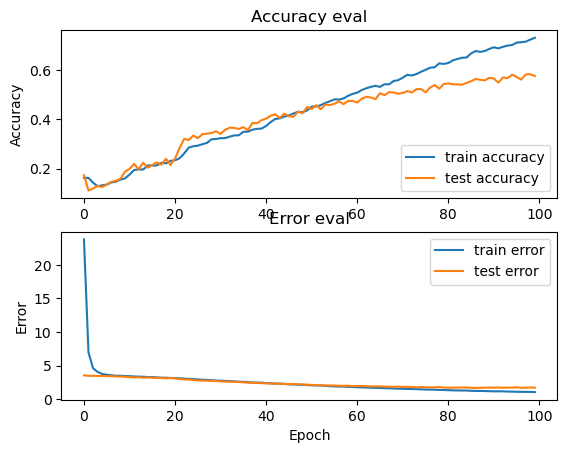

In [1]:
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = "C:\Programming\Deep learning project\json_files\data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
        #convert lists into numpy arrays
        inputs=np.array(data["mfcc"])
        targets=np.array(data["labels"])
        
        targets-=1
        print("Data successfully loaded")
        return inputs,targets

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)
    
    #create accuracy subplots
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

    
    
if __name__ == "__main__":
    #load data
    inputs, targets = load_data(DATASET_PATH)
    
    #split the data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test  = train_test_split(inputs, 
                                                                               targets, 
                                                                               test_size=0.3)
    #build the network architecture using keras
    model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
        
        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), batch_size=32, epochs=100)
    
    #plot history and error over the epochs
    plot_history(history)